<a href="https://colab.research.google.com/github/ryanleeallred/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [1]:
# Imports
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

---
#### Replicate the Lesson Code

In [2]:
# Load the datasets
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [3]:
print(income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape)

(46513, 3) (44370, 3) (59297, 3) (273, 33) (590, 16)


In [4]:
# Allow for multiple dataframe outputs in a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# Set display settings and display head of all datasets
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

income.head()
lifespan.head()
population.head()
entities.head()
concepts.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


##### Merge the Data

In [6]:
# Test out if the auto-merge is consistent
income_lifespan_auto = pd.merge(income, lifespan)
income_lifespan = pd.merge(income, lifespan, how="inner", on=["geo", "time"])

# Just to see the shape visually - tested below
income_lifespan_auto.shape
income_lifespan.shape

# If no error, means the automatic merge worked as expected
assert income_lifespan_auto.shape[0] == income_lifespan.shape[0] and income_lifespan_auto.shape[1] == income_lifespan.shape[1]

(40437, 4)

(40437, 4)

In [7]:
# Merge population with the merged (income + lifespan)
df_0 = pd.merge(income_lifespan, population)
df_0.shape
df_0.head()

(40437, 5)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [8]:
# Merge "entities" with the merged (income + lifespan + population)
entities_cols = [
    "country",
    "name",
    "world_4region",
    "world_6region",
]

df = pd.merge(df_0, entities[entities_cols], left_on="geo", right_on="country")

df.shape
df.head()

(40437, 9)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [9]:
# Rename the columns into something a bit more useable
df = df.rename(columns = {
   'country': 'country_code',
   'time': 'year',
   'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
   'life_expectancy_years': 'lifespan',
   'population_total': 'population',
   'name': 'country',
   'world_6region': '6region',
   'world_4region': '4region'
})

df.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


##### Explore the Data

In [10]:
# Check out the data types to make sure they're all correct
print(df.dtypes)

geo              object
year              int64
income            int64
lifespan        float64
population        int64
country_code     object
country          object
4region          object
6region          object
dtype: object


In [11]:
# Look at summary stats for numerical and non
df.describe()
df.describe(exclude="number")

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


,geo,country_code,country,4region,6region
count,40437,40437,40437,40437,40437
unique,187,187,187,4,6
top,chl,chl,China,africa,europe_central_asia
freq,219,219,219,11826,10778


In [12]:
df.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [13]:
# Filter dataframe for USA records
usa = df[df.geo == "usa"]
usa.head()
usa.describe()

,geo,year,income,lifespan,population,country_code,country,4region,6region
38028,usa,1800,2127,39.41,6801854,usa,United States,americas,america
38029,usa,1801,2167,39.41,6933517,usa,United States,americas,america
38030,usa,1802,2202,39.41,7067728,usa,United States,americas,america
38031,usa,1803,2166,39.41,7204538,usa,United States,americas,america
38032,usa,1804,2165,39.41,7343995,usa,United States,americas,america


,year,income,lifespan,population
count,219.000000,219.000000,219.000000,2.190000e+02
mean,1909.000000,14572.936073,54.846256,1.163662e+08
std,63.364028,15066.042247,15.202079,9.738644e+07
min,1800.000000,2113.000000,31.000000,6.801854e+06
25%,1854.500000,3512.500000,39.410000,2.752198e+07
50%,1909.000000,7989.000000,51.780000,9.236198e+07
75%,1963.500000,20090.500000,70.270000,1.962540e+08
max,2018.000000,54898.000000,79.140000,3.267667e+08


In [14]:
# Filter USA records for specific year(s)
years = [1810, 1830, 1910, 1930, 1990, 2010, 2018]
usa[usa.year.isin(years)]

,geo,year,income,lifespan,population,country_code,country,4region,6region
38038,usa,1810,2282,39.41,8294928,usa,United States,americas,america
38058,usa,1830,2551,39.41,13480460,usa,United States,americas,america
38138,usa,1910,8282,51.78,94088789,usa,United States,americas,america
38158,usa,1930,10136,59.57,125841184,usa,United States,americas,america
38218,usa,1990,37062,75.40,252529950,usa,United States,americas,america
38238,usa,2010,49373,78.74,308641391,usa,United States,americas,america
38246,usa,2018,54898,79.14,326766748,usa,United States,americas,america


In [15]:
# Dataframe of Mexico records
mexico = df[df.country == "Mexico"]
mexico.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
23308,mex,1800,1378,26.9,6181708,mex,Mexico,americas,america
23309,mex,1801,1378,26.9,6201367,mex,Mexico,americas,america
23310,mex,1802,1379,26.9,6221089,mex,Mexico,americas,america
23311,mex,1803,1379,26.9,6240873,mex,Mexico,americas,america
23312,mex,1804,1379,26.9,6260721,mex,Mexico,americas,america


##### Plot Visualization

In [16]:
# Display the pandas dataframes all nice and table-like
InteractiveShell.ast_node_interactivity = "all"

In [17]:
# Create "before" and "after" dataframes for visual comparison
before = df[df["year"] == 1900]
after = df[df["year"] == 2018]

before.head()
after.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
100,afg,1900,793,29.22,5021241,afg,Afghanistan,asia,south_asia
319,ago,1900,958,29.54,2995663,ago,Angola,africa,sub_saharan_africa
538,alb,1900,1156,35.47,819951,alb,Albania,europe,europe_central_asia
804,are,1900,2001,31.24,47853,are,United Arab Emirates,asia,middle_east_north_africa
1023,arg,1900,5999,36.62,4756635,arg,Argentina,americas,america


,geo,year,income,lifespan,population,country_code,country,4region,6region
218,afg,2018,1867,58.69,36373176,afg,Afghanistan,asia,south_asia
437,ago,2018,5846,65.19,30774205,ago,Angola,africa,sub_saharan_africa
656,alb,2018,12424,78.01,2934363,alb,Albania,europe,europe_central_asia
922,are,2018,68231,76.89,9541615,are,United Arab Emirates,asia,middle_east_north_africa
1141,arg,2018,18942,76.97,44688864,arg,Argentina,americas,america


In [18]:
# For the graphing portion, set the node interactivity to not display any expressions for assignments
InteractiveShell.ast_node_interactivity = "none"

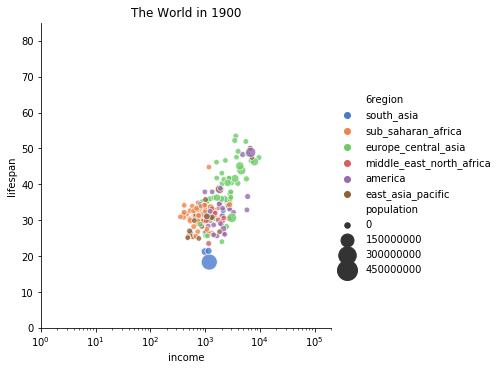

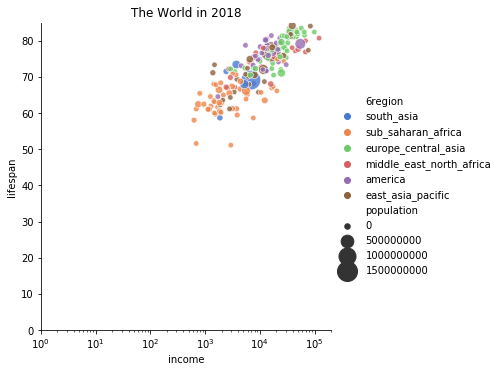

In [19]:
# Create two plots to compare the two snapshots
sns.relplot(x="income", y="lifespan", hue="6region", size="population", sizes=(30, 400), alpha=0.8, palette="muted", data=before)
plt.xscale("log")
plt.title("The World in 1900")
plt.ylim(0, 85)
plt.xlim(1, 200000)

sns.relplot(x="income", y="lifespan", hue="6region", size="population", sizes=(30, 400), alpha=0.8, palette="muted", data=after)
plt.xscale("log")
plt.title("The World in 2018")
plt.ylim(0, 85)
plt.xlim(1, 200000)

##### Analyze Outliers

In [20]:
# Display the dataframes nice and table-like
InteractiveShell.ast_node_interactivity = "all"

In [21]:
# Look for the outlier with a high income
after.sort_values("income", ascending=False).head()  # Turns out it's Qatar

,geo,year,income,lifespan,population,country_code,country,4region,6region
30362,qat,2018,121033,80.71,2694849,qat,Qatar,asia,middle_east_north_africa
22212,lux,2018,99034,82.39,590321,lux,Luxembourg,europe,europe_central_asia
31895,sgp,2018,83888,84.03,5791901,sgp,Singapore,asia,east_asia_pacific
5521,brn,2018,76943,77.36,434076,brn,Brunei,asia,east_asia_pacific
20241,kwt,2018,68359,79.96,4197128,kwt,Kuwait,asia,middle_east_north_africa


In [22]:
# Filter for Qatar to single out the datapoint for labeling
after_qatar = after[after["geo"] == "qat"]
after_qatar

,geo,year,income,lifespan,population,country_code,country,4region,6region
30362,qat,2018,121033,80.71,2694849,qat,Qatar,asia,middle_east_north_africa


In [23]:
# No display for graphing
InteractiveShell.ast_node_interactivity = "none"

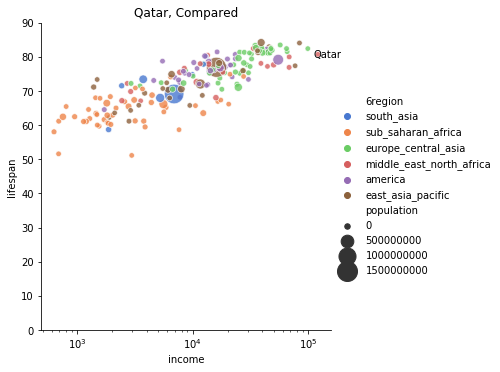

In [24]:
# Use Qatar's row to label that dot on the graph
sns.relplot(x="income", y="lifespan", hue="6region", size="population", sizes=(30, 400), alpha=0.8, palette="muted", data=after)
plt.xscale("log")
plt.ylim(0, 90)
plt.title("Qatar, Compared")
plt.text(x=(after_qatar["income"] - 10000), y=after_qatar["lifespan"] - 1, s="Qatar")  # Threaded the needle
plt.show()

##### Plotting Multiple Years

In [25]:
# Display the dataframes nice and table-like
InteractiveShell.ast_node_interactivity = "all"

In [26]:
years = [1810, 1910, 2010]

centuries = df[df["year"].isin(years)]
centuries.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
10,afg,1810,604,28.11,3280000,afg,Afghanistan,asia,south_asia
110,afg,1910,820,29.77,5351413,afg,Afghanistan,asia,south_asia
210,afg,2010,1614,56.20,28803167,afg,Afghanistan,asia,south_asia
229,ago,1810,645,26.98,1567028,ago,Angola,africa,sub_saharan_africa
329,ago,1910,1001,30.39,3262493,ago,Angola,africa,sub_saharan_africa


In [27]:
# No display for graphing
InteractiveShell.ast_node_interactivity = "none"

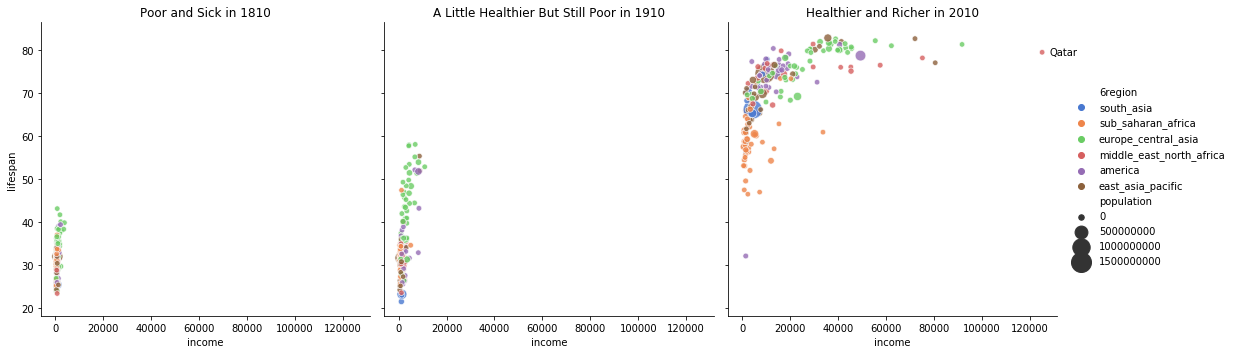

In [28]:
# Plot three separate graphs, one for each year in list of years
fig = sns.relplot(x="income", y="lifespan", hue="6region", size="population", sizes=(30, 400), palette="muted", alpha=0.8, col="year", data=centuries)

axes = fig.axes.flatten()
axes[0].set_title("Poor and Sick in 1810")
axes[1].set_title("A Little Healthier But Still Poor in 1910")
axes[2].set_title("Healthier and Richer in 2010")
plt.text(x=(after_qatar["income"] + 7000), y=after_qatar["lifespan"] - 1.9, s="Qatar")

##### Showcase a Story

In [29]:
years = [1900, 1910, 1930, 1970, 2010]

In [30]:
# Write looping function to iteratively create a plot for each year
def year_plots(years):
    """Iterates through list of integers, drawing a plot for each."""
    for year in years:
        sns.relplot(x="income", y="lifespan", hue="6region", size="population", 
                    sizes=(30, 400), palette="muted", data=df[df["year"] == year])
        plt.xscale("log")
        plt.xlim(1, 200000)
        plt.ylim(0, 90)
        plt.title(f"Countries Above the Poverty Line in {year}")
        plt.axvline(x=1000, color="purple")

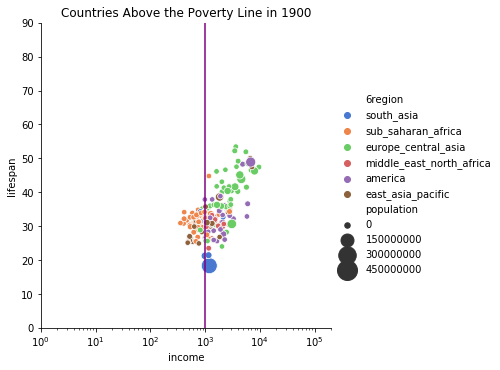

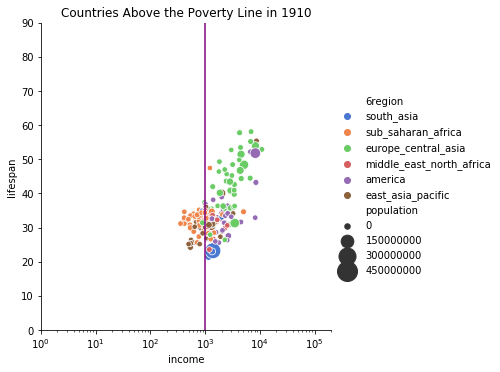

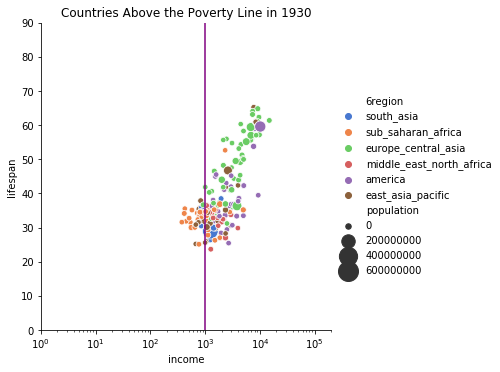

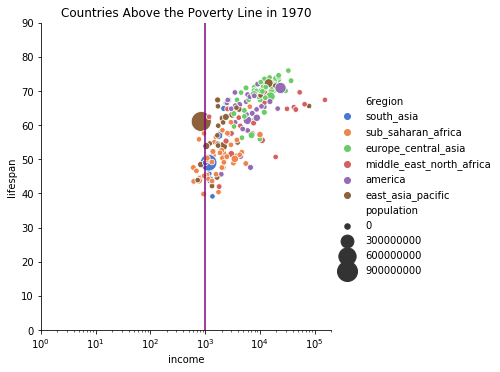

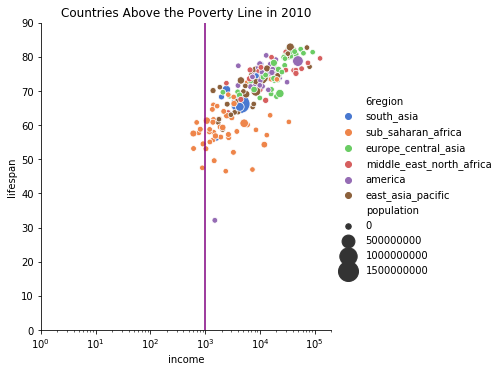

In [31]:
year_plots(years)  # Let 'er rip!

---
#### Take It To The Limit!

Take it further by using the same gapminder dataset to create a sequence of visualizations that, when combined, tell a story of your choosing.

Some interesting avenues of exploration:

- Mean, median income / lifespan each year over time
- Some sort of grouping / aggregation for decades and regions
- Focus on a large event that visibly affected one or more regions

However, the question states to only do a new visualization. I'll make it simple and just use the `df` already set up to create those visualizations.

With that in mind, here are some ideas:

- Compare the countries' historical data (line plot?)
- Group by region and graph snapshots and/or timeline

In [32]:
# Display the dataframes nice and table-like
InteractiveShell.ast_node_interactivity = "all"

In [33]:
df.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


It would be interesting to take some sort of aggregate (mean, median, etc.) for each of the 6 regions for each year, then plot those six lines through a certain time period.

Time to study up on the `.groupby()` method!

In [34]:
# Group by 6region and year, then calculate the mean lifespan
# Unstack removes hierarchical indexing
regional_lifespan = df["lifespan"].groupby([df["6region"], df["year"]]).mean().unstack()
regional_lifespan.head()

year,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
6region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
america,31.775152,31.779091,31.782727,31.786667,31.790606,31.795455,31.800303,31.805152,31.810000,31.814848,31.819091,31.823636,31.827879,31.832121,31.836364,31.839394,31.842424,31.845758,31.848788,31.851818,31.862121,31.872424,31.882727,31.893030,31.903636,31.898788,31.893636,31.888788,31.883939,31.879091,31.883333,31.887879,31.896061,31.904242,31.912424,31.917879,31.923636,31.929394,31.935152,32.000000,32.060303,32.120000,32.177879,32.236667,32.294545,32.297879,32.301515,32.304848,32.308485,32.311818,32.316061,32.320000,32.323333,32.326970,32.330303,32.332424,32.334848,32.336970,32.339091,32.341515,32.332121,32.280303,32.166061,32.143030,32.043939,32.227576,32.241818,32.213030,32.184545,32.155758,32.160606,32.173030,32.190606,32.208485,32.226061,32.276667,32.326364,32.377879,32.428485,32.479394,32.525758,32.586970,32.822424,32.817879,32.847273,32.906364,32.931212,32.941818,33.087879,33.111818,32.932727,32.888788,32.823333,32.680303,32.705152,32.759394,32.782121,32.726364,32.853636,32.785152,33.369697,33.405758,33.610606,33.483636,33.471515,33.581818,33.492121,33.451212,33.807576,33.925152,33.880303,34.048182,34.057879,34.222121,34.364545,34.431515,34.465152,34.434848,27.319091,34.803939,34.861212,34.907576,35.390303,35.750000,36.152424,36.473939,36.925152,37.533939,37.762121,38.193636,38.724242,39.194242,39.748485,40.136667,40.715152,41.289091,41.794848,42.412727,43.179697,44.114848,44.587879,45.542121,46.319091,47.233333,48.075455,48.976970,49.936667,50.814848,51.834545,52.732121,53.820909,54.102424,54.641212,55.196061,55.780909,56.323636,56.866970,57.402727,57.973333,58.517576,59.058788,59.593939,60.089394,60.560909,61.036364,61.478485,61.902424,62.331818,62.733939,63.153333,63.684118,64.395882,64.538529,65.194118,65.585294,66.195882,66.396765,67.037647,67.343824,67.630294,68.223529,68.367647,68.745588,68.930882,69.184118,69.390588,69.771176,70.005588,70.402059,70.562647,70.885882,71.024412,71.167647,71.266471,71.429706,71.632647,71.849412,72.088529,72.049118,72.392059,72.693529,72.857353,73.032941,73.201471,73.353824,73.620000,73.831176,74.039118,74.215588,74.374706,73.649118,74.642941,74.792059,74.937353,75.085294,75.194412,75.380294,75.637576,75.820303
east_asia_pacific,29.659615,29.659615,29.659615,29.659615,29.659615,29.659615,29.659615,29.659615,29.659615,29.659615,29.659615,29.659615,29.659615,29.660000,29.660000,29.660000,29.660000,29.660000,29.660000,29.660000,29.697692,29.735385,29.773077,29.810769,29.848462,29.848462,29.848462,29.848462,29.848462,29.848462,29.848462,29.848462,29.848462,29.848462,29.848462,29.848462,29.848462,29.848462,29.848846,29.848846,29.848846,29.848846,29.848846,29.848846,29.848846,29.8488

That looks like exactly what I want! Except maybe I should transpose / reshape it so the regions are the columns.

In [35]:
region_life_transpose = regional_lifespan.T  # Easy as that
region_life_transpose.head()

6region,america,east_asia_pacific,europe_central_asia,middle_east_north_africa,south_asia,sub_saharan_africa
year,,,,,,
1800,31.775152,29.659615,34.241020,30.2855,28.97500,30.448958
1801,31.779091,29.659615,34.224898,30.2855,28.97375,30.307500
1802,31.782727,29.659615,34.291224,30.2855,28.91750,30.307708
1803,31.786667,29.659615,33.817143,30.2855,28.79125,30.449583
1804,31.790606,29.659615,34.107347,30.2855,28.72750,30.449792


Time to plot this bad boy.

In [36]:
# No display for graphing
InteractiveShell.ast_node_interactivity = "none"

In [37]:
# Group the income by 6region and year, then calculate the mean of the groups
# Unstack removes hierarchical indexing
region_income = df["income"].groupby([df["6region"], df["year"]]).mean().unstack().T
region_income.head()

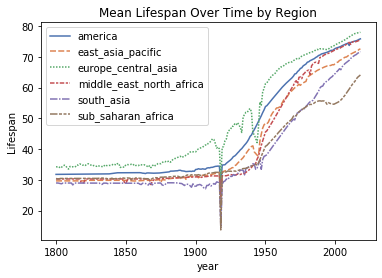

In [38]:
# Line plot of mean lifespan over time
sns.lineplot(data=region_life_transpose, palette="deep")
plt.title("Mean Lifespan Over Time by Region")
plt.ylabel("Lifespan")

The question states to use a series of graphs. Thus, either I'll have to use the dimensions in a different way or create other similar graphs that can extend the story of the previous one.

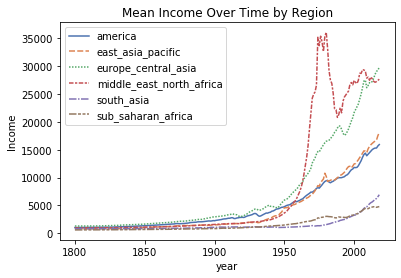

In [39]:
# Line plot of mean regional income over time
sns.lineplot(data=region_income, palette="deep")
plt.title("Mean Income Over Time by Region")
plt.ylabel("Income")

#### Sequential (For Real This Time)

As the last graphs are not sequential, I'm going to go for a different story. I'm going to look at how lifespan is related to income

In [40]:
# Display the dataframes nice and table-like
InteractiveShell.ast_node_interactivity = "all"

In [41]:
df.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [42]:
# No display for graphing
InteractiveShell.ast_node_interactivity = "none"

In [43]:
years = [1900, 1910, 1930, 1970, 2010]

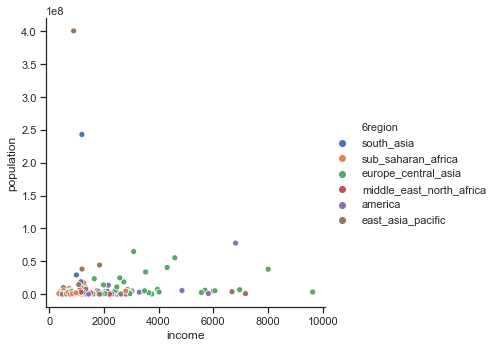

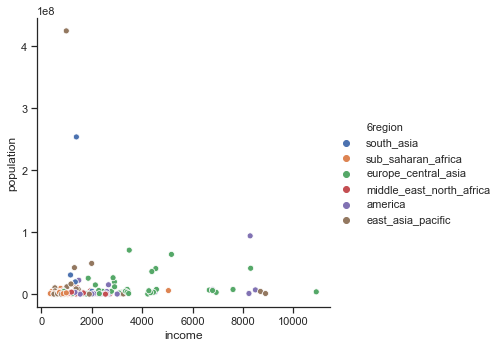

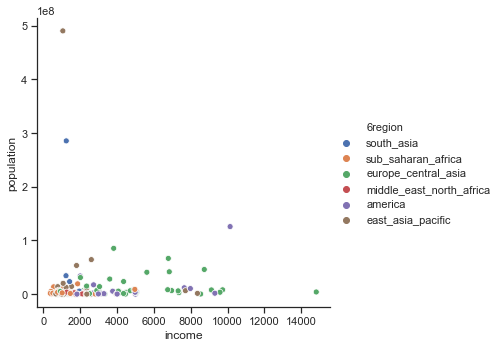

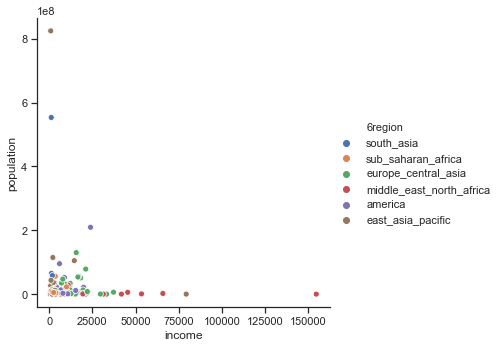

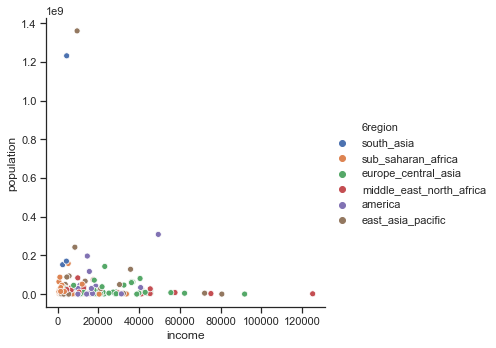

In [55]:
sns.set(style="ticks")

# Plot the lines on two facets
for year in years:
    sns.relplot(x="income", y="population",
                hue="6region", palette="deep",
                legend="full", data=df[df["year"] == year])

Still much more to do on this one, but I'll leave it here for now.

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [ ]:
# TODO